In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.special import gammainc

<img src= 'Practica_7_page-0001.jpg' width="600px"> 

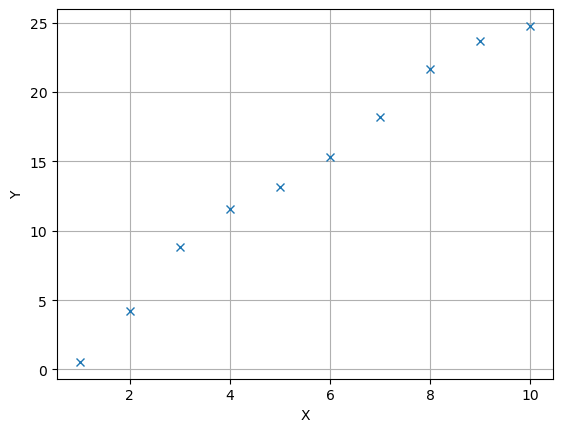

In [2]:
# 1) we start with the visualization of the data using the following file 
data_file = np.loadtxt('Points_chi2_example_cov.txt')
# we asign the entries of the file with de position 
x, y = data_file[:,0], data_file[:,1]

# 2) now we read the another file 
cov_file=np.loadtxt('Covariance_chi2_example_cov.txt')
# and plot the the error bars 
plt.plot(x,y,'x',)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()



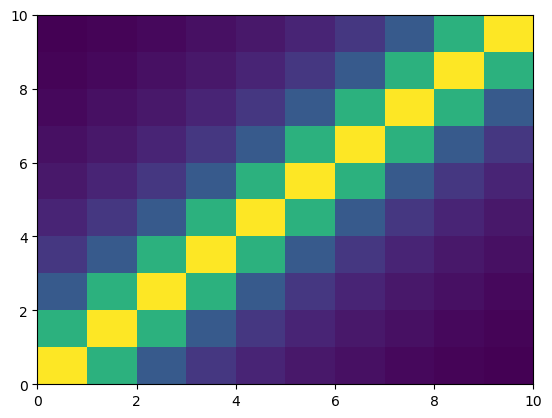

In [3]:
# 3 the pcolormesh of the covariance matrix is 
plt.pcolormesh(cov_file)

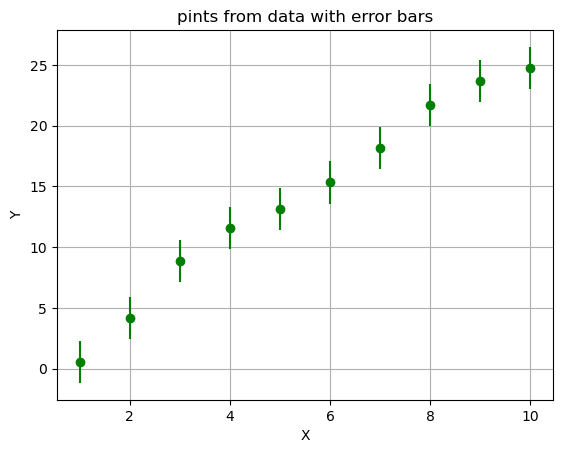

In [4]:
# 4) now we need to plot the points with its error bars, for this, note that 
error_file =np.sqrt(np.diag(cov_file))
# and the plot is 
plt.title('pints from data with error bars')
plt.errorbar(x,y,yerr=error_file,fmt='o', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

In [5]:
#1.2) Find best fit parameters 
# 5) we define the two arrays 
A_arr=np.arange(-5,5,0.1)
B_arr=np.arange(-5,5,0.1)

cov_Diag_file=np.diag(np.diag(cov_file))
cov_Diag_file 

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [7]:
# 6) now we create the new 2D-array 

chi2_arr = np.zeros((len(A_arr),len(B_arr)))

for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        chi2_arr[i,j]=(1/2)*np.dot((A_arr[i]*x+B_arr[j] - y).T,np.dot(np.linalg.inv(cov_Diag_file),(A_arr[i]*x+B_arr[j] - y)))




# 7) and for gthe diagonal matrix we do the analogous procedure
chi2_arr_diag = np.zeros((len(A_arr),len(B_arr)))

for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        chi2_arr_diag[i,j]=(1/2)*(1/2)*np.dot((A_arr[i]*x + B_arr[j] - y).T, np.dot(np.linalg.inv(cov_Diag_file),(A_arr[i]*x + B_arr[j] - y)))


In [8]:
#8 now we find the best fit for the parameters in the following way 
index_bf = np.where(chi2_arr==np.min(chi2_arr))

A_best = A_arr[index_bf[0][0]]
B_best = B_arr[index_bf[1][0]]
print(' A_best ------->', A_best, '\n B_best ------->', B_best, '\n for the indices', index_bf)


 A_best -------> 2.6999999999999726 
 B_best -------> -0.7000000000000153 
 for the indices (array([77]), array([43]))


In [13]:
np.min(chi2_arr)

1.6200778702032868

In [ ]:
#Tenoemos que el número de grados de libertad es igual al npumero de puntos menos el número de parámetros
np.min(chi2_arr)/(x.shape[0] - 2)


0.257476985086863

In [ ]:
# 8) we same the process for the diagonal matrix
index_diag = np.where( chi2_arr_diag == np.min(chi2_arr_diag))

A_diag = A_arr[index_diag[0][0]]
B_diag = B_arr[index_diag[1][0]]
print(' A_diag =', A_diag, '\n B_diag =', B_diag, '\n corresponding to the indices', index_diag)


 A_diag = 2.6999999999999726 
 B_diag = -0.7000000000000153 
 corresponding to the indices (array([77]), array([43]))


In [ ]:
## now remember that we can calculate the number of degrees of freedom 
N_dof = len(X) - 2 
np.min(chi2_arr)/2

1.029907940347452

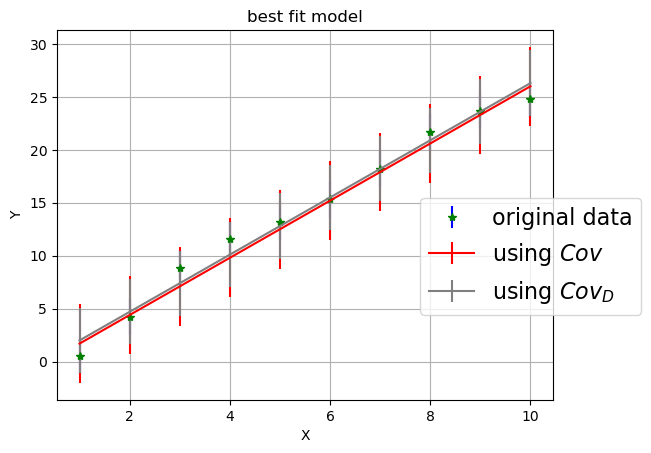

In [ ]:
#9) Finally, we plot the again the points using the error bars
error_total = np.sqrt(np.linalg.norm(cov)) 
# and using the diagonal matrix
error_total_diag = np.sqrt(np.linalg.norm(covD))
# the plot is
plt.title('best fit model')
plt.errorbar(x,y,yerr=y_error ,ecolor='blue', color='green',label='original data',fmt='*')
plt.errorbar(x,A_best*x + B_best,error_cov, color='red', label='using $Cov$')
plt.errorbar(x,A_bestD*x + B_bestD,error_diag, color='gray', label='using $Cov_D$')
plt.legend(loc='lower right',bbox_to_anchor=(1.2, 0.2), fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

<img src= 'Practica_7_page-0002.jpg' width="600px"> 

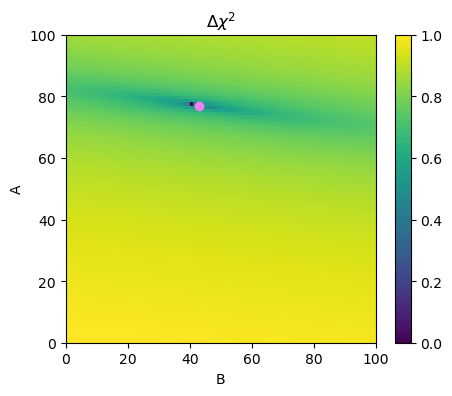

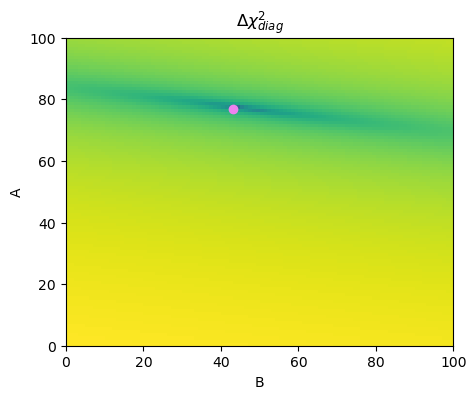

In [ ]:
#1.3) Confidence contours 

# 10) now we create two new arrays using the information about chi2_arr and chi2_arr_diag 
Delta_chi2_arr = chi2_arr - np.min(chi2_arr)
Delta_chi2_arr_diag = chi2_arr_diag - np.min(chi2_arr_diag)

# 11) and the plot using pcolormesh is 

plt.pcolormesh(np.log(Delta_chi2_arr + 1e-6)) 
plt.scatter(index_diag[1][0], index_diag[0][0],color='violet',label=r'Best fit')
plt.title(r'$\Delta \chi^2$')
plt.xlabel('B')
plt.ylabel('A')
plt.colorbar()
plt.show()

plt.pcolormesh(np.log(Delta_chi2_arr_diag + 1e-6))
plt.scatter(index_diag[1][0], index_diag[0][0],color='violet',label=r'Best fit')
plt.title(r'$\Delta \chi^2_{diag}$')
plt.xlabel('B')
plt.ylabel('A')
plt.colorbar
plt.show()


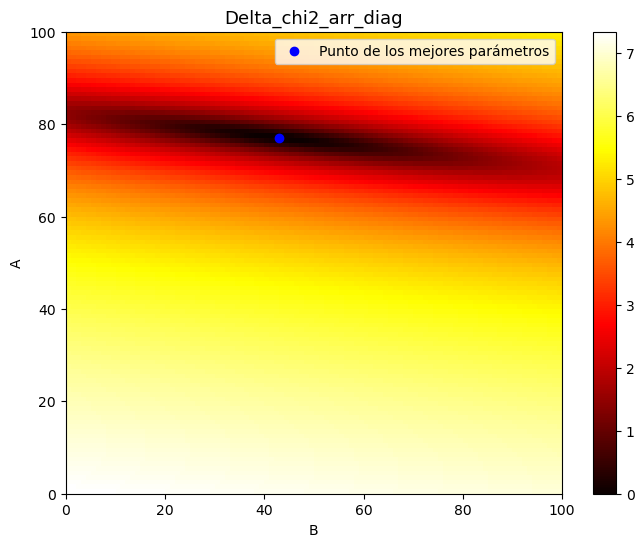

In [ ]:
plt.figure(figsize=(8,6))
plt.pcolormesh(np.log(Delta_chi2_arr+1), cmap='hot')     # plt.pcolormesh([X, Y,] data_cov)
plt.plot(indexD[1][0], indexD[0][0],'ob',label='Punto de los mejores parámetros')
plt.colorbar()
plt.title('Delta_chi2_arr_diag', size=13)
plt.xlabel('B')
plt.ylabel('A')
plt.legend()

In [ ]:
# 12) now we generate the contour plots for the 2 parameters using 1, 2sigma, 3sigma. 
s_diag = 1/np.sqrt(np.linalg.inv(covD))
np.linalg.inv(covD)
# the  real values for the 2 parameters are
A_real = 2.7
B_real = -2.3
# using again the model  
f_real = A_real*x + B_real

/tmp/ipykernel_10123/1515639511.py:2: RuntimeWarning: divide by zero encountered in divide
  s_diag = 1/np.sqrt(np.linalg.inv(covD))


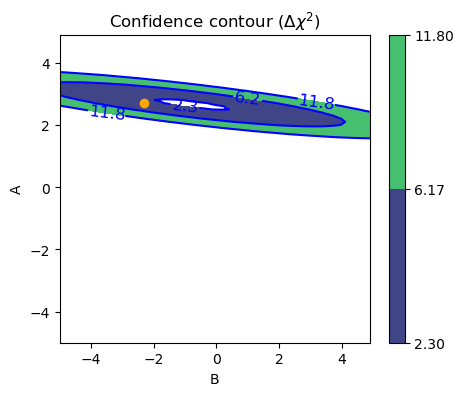

In [ ]:
x,y = np.meshgrid(A_arr, B_arr)

plt.figure()
# using the sigma values 
sig = [2.3, 6.17, 11.8]
contour = plt.contour(x, y, chi2_arr, sig, colors='b')
plt.clabel(contour, fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(x, y, chi2_arr, sig)
plt.colorbar(contour_filled)
plt.title('Confidence contour ($\Delta \chi^2$)')
plt.xlabel('B')
plt.ylabel('A')
plt.scatter(B_real, A_real,color='orange',label=r'Real value')
plt.show()

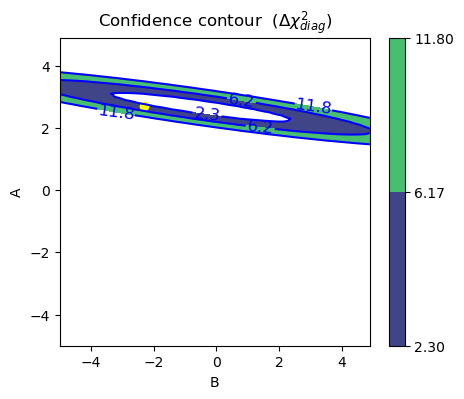

In [ ]:
plt.figure()
contour = plt.contour(x, y, chi2_arr_diag, sig, colors='b')
plt.clabel(contour, fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(x, y, chi2_arr_diag, sig)
plt.colorbar(contour_filled)

plt.title('Confidence contour  ($\Delta \chi^2_{diag}$)')
plt.xlabel('B')
plt.ylabel('A')
plt.scatter(B_real, A_real,color='yellow',label=r'Real value')
plt.show()

In [ ]:
# 13) we can note from the plots that real values are in the 2sigma regions for the normal case and the diagonal case. 

In [ ]:
# 2) calculate the p-values for distinc chi^2
# first we asign the values of the chi^2
c2_1=25.1
c2_2=25
c2_3=41.5
c2_4=30.3
c2_5=28.1
c2_6=60.1

# and with the number of degrees of freedom

n_1=16 
n_2=18 
n_3=20 
n_4=23 
n_5=25
n_6=33

#thus, the value of the probability distribution function in each case are 
P1 = gammainc(n_1/2, chi2_1/2)
P2 = gammainc(n_2/2, chi2_2/2)
P3 = gammainc(n_3/2, chi2_3/2)
P4 = gammainc(n_4/2, chi2_4/2)
P5 = gammainc(n_5/2, chi2_5/2)
P6 = gammainc(n_6/2, chi2_6/2)

print('The CDF values are \n P1 =', P1,'\n \n P2 =',P2,'\n\n P3 =',P3,'\n\n P4 =',P4,'\n\n P5 =',P5,'\n\n P6 =',P6)




The CDF values are 
 P1 = 0.9319181574825899 
 
 P2 = 0.8750838030553295 

 P3 = 0.9967884952135365 

 P4 = 0.8590180518014623 

 P5 = 0.696729713915238 

 P6 = 0.9973031897321615
